In [1]:
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
import librosa
import librosa.display

In [3]:
AUDIO_PATH = './Data/Audio_Spotify_Test/'
IMAGE_PATH = './Data/Image_Spotify_Test/'

SIZE = 2.56

In [4]:
print('The genres used for classification:')
print(list(os.listdir(AUDIO_PATH)))

The genres used for classification:
['blues', 'classical', 'country', 'disco', 'hip-hop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Make spectrograms for audio input

In [5]:
def save_melspectrogram(y, sr, save_path):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    plt.figure(figsize=(SIZE, SIZE))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.savefig(save_path)
    plt.close()

In [12]:
genres = list(os.listdir(AUDIO_PATH))

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre
    image_path = IMAGE_PATH + '/' + genre

    for filename in list(os.listdir(genre_path)):
        image_name = os.path.splitext(filename)[0] + '.png'
        
        y, sr = librosa.load(genre_path + '/' + filename)
        save_melspectrogram(y, sr, image_path + '/' + image_name)


# Try something different

Also data augmentation techniques such as frequecny and time masking and adding noise to the input (deviation 0.01 * 30s).

In [5]:
# used for train split
def save_mel_ampl(y, sr, save_path):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    
    plt.figure(figsize=(SIZE, SIZE))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '_0.png')
    plt.close()

    S_masked = tfio.audio.freq_mask(tf.convert_to_tensor(S_db), param=10)
    plt.figure(figsize=(SIZE, SIZE))
    librosa.display.specshow(S_masked.numpy(), sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '_1.png')
    plt.close()

    S_masked = tfio.audio.time_mask(tf.convert_to_tensor(S_db), param=10)
    plt.figure(figsize=(SIZE, SIZE))
    librosa.display.specshow(S_masked.numpy(), sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '_2.png')
    plt.close()

    S_masked = tf.convert_to_tensor(S_db) + tf.random.normal(tf.shape(tf.convert_to_tensor(S_db)), mean=0, stddev=0.3, dtype=tf.float32)
    plt.figure(figsize=(SIZE, SIZE))
    librosa.display.specshow(S_masked.numpy(), sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '_3.png')
    plt.close()

In [11]:
# used for test split (without data augmentation)
def save_mel_ampl(y, sr, save_path):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    
    plt.figure(figsize=(SIZE, SIZE))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '.png')
    plt.close()

In [ ]:
genres = list(os.listdir(AUDIO_PATH))

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre
    image_path = IMAGE_PATH + '/' + genre

    # print(len(list(os.listdir(genre_path))))
    for filename in list(os.listdir(genre_path)):
        image_name = os.path.splitext(filename)[0]
        
        if not os.path.exists(image_path + '/' + image_name + '.png'):
            print(f'Loading {genre_path}//{filename} to {genre_path}//{image_name}')
            y, sr = librosa.load(genre_path + '/' + filename)
            save_mel_ampl(y, sr, image_path + '/' + image_name)

In [6]:
AUDIO_PATH = './Data/Audio_Spotify_Test/'
IMAGE_PATH = './Data/Image_Spotify2/'

# add images from count
genres = list(os.listdir(AUDIO_PATH))

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre
    image_path = IMAGE_PATH + '/' + genre
    count = 500

    for filename in list(os.listdir(genre_path)):
        count += 1
        image_name = str(count)
        
        if not os.path.exists(image_path + '/' + image_name + '_3.png'):
            print(f'Loading {genre_path}//{filename} to {image_path}//{image_name}')
            y, sr = librosa.load(genre_path + '/' + filename)
            save_mel_ampl(y, sr, image_path + '/' + image_name)

Loading ./Data/Audio_Spotify_Test//jazz//191.mp3 to ./Data/Image_Spotify2//jazz//603
Loading ./Data/Audio_Spotify_Test//jazz//192.mp3 to ./Data/Image_Spotify2//jazz//604
Loading ./Data/Audio_Spotify_Test//jazz//193.mp3 to ./Data/Image_Spotify2//jazz//605
Loading ./Data/Audio_Spotify_Test//jazz//194.mp3 to ./Data/Image_Spotify2//jazz//606
Loading ./Data/Audio_Spotify_Test//jazz//195.mp3 to ./Data/Image_Spotify2//jazz//607
Loading ./Data/Audio_Spotify_Test//jazz//196.mp3 to ./Data/Image_Spotify2//jazz//608
Loading ./Data/Audio_Spotify_Test//jazz//197.mp3 to ./Data/Image_Spotify2//jazz//609
Loading ./Data/Audio_Spotify_Test//jazz//198.mp3 to ./Data/Image_Spotify2//jazz//610
Loading ./Data/Audio_Spotify_Test//jazz//199.mp3 to ./Data/Image_Spotify2//jazz//611
Loading ./Data/Audio_Spotify_Test//jazz//2.mp3 to ./Data/Image_Spotify2//jazz//612
Loading ./Data/Audio_Spotify_Test//jazz//20.mp3 to ./Data/Image_Spotify2//jazz//613
Loading ./Data/Audio_Spotify_Test//jazz//200.mp3 to ./Data/Image_Spo

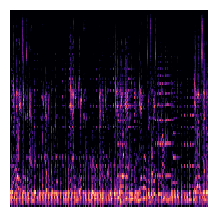

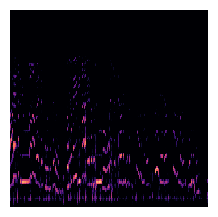

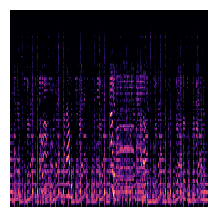

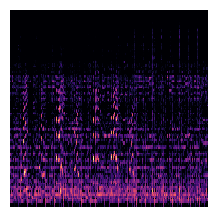

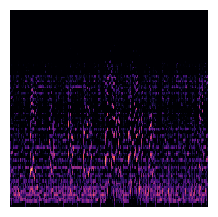

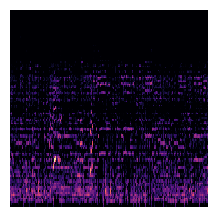

In [9]:
genres = list(os.listdir(AUDIO_PATH))

counter = 0

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre

    for filename in list(os.listdir(genre_path)):
        if counter > 5:
            break
        counter += 1
        y, sr = librosa.load(genre_path + '/' + filename)
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_db = librosa.amplitude_to_db(S, ref=np.max)
        
        plt.figure(figsize=(SIZE, SIZE))
        librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
        plt.axis('off')
        # plt.savefig(save_path)
        plt.show()
        # plt.close()
    
    break
        

Data analysis for ML algorithms

In [1]:
AUDIO_PATH = './Data/Audio_Spotify/'

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label']

In [14]:
x, sr = librosa.load(AUDIO_PATH + 'blues/1.mp3')

In [15]:
chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr).ravel()
np.mean(chroma_stft), np.var(chroma_stft)

(0.39378732, 0.08718168)

In [16]:
rms = librosa.feature.rms(y=x).ravel()
np.mean(rms), np.var(rms)

(0.23481572, 0.003926935)

In [17]:
spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=sr).ravel()
np.mean(spectral_centroid), np.var(spectral_centroid)

(2568.307499169952, 908447.6374645568)

In [19]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=x, sr=sr).ravel()
np.mean(spectral_bandwidth), np.var(spectral_bandwidth)

(2330.6035687514845, 308715.57731686736)

In [20]:
rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr).ravel()
np.mean(rolloff), np.var(rolloff)

(5218.125972747803, 3324585.211880211)

In [34]:
flatness = librosa.feature.spectral_flatness(y=x).ravel()
np.mean(flatness), np.var(flatness)

(0.025396824, 0.0007850744)

In [35]:
contrast = librosa.feature.spectral_contrast(y=x, sr=sr).ravel()
np.mean(contrast), np.var(contrast)

(23.453266856423156, 134.59535753857242)

In [36]:
flux = librosa.onset.onset_strength(y=x, sr=sr).ravel()
np.mean(flux), np.var(flux)

(0.9951533, 0.55612326)

In [22]:
zcr = librosa.feature.zero_crossing_rate(y=x).ravel()
np.mean(zcr), np.var(zcr)

(0.13465957641601561, 0.005400888551375828)

In [30]:
harmonics = librosa.effects.harmonic(y=x).ravel()
np.mean(harmonics), np.var(harmonics)

(-4.274007e-06, 0.034709305)

In [39]:
percussive = librosa.effects.percussive(y=x).ravel()
np.mean(percussive), np.var(percussive)

(-0.00022498457, 0.010013301)

In [40]:
tempo = librosa.feature.tempo(y=x, sr=sr).ravel()
tempo[0]

117.45383522727273

In [37]:
mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=20)
for idx, v_mfcc in enumerate(mfcc):
    v_mfcc = v_mfcc.ravel()
    print(f'mfcc_{idx}: {np.mean(v_mfcc)}, {np.var(v_mfcc)}')

mfcc_0: -43.530704498291016, 6510.5927734375
mfcc_1: 71.488525390625, 1698.6099853515625
mfcc_2: -20.188575744628906, 390.24835205078125
mfcc_3: 54.64734649658203, 510.93096923828125
mfcc_4: 20.58395767211914, 116.7415771484375
mfcc_5: 11.919726371765137, 36.648197174072266
mfcc_6: -1.6644741296768188, 40.24420928955078
mfcc_7: 11.242986679077148, 62.6605224609375
mfcc_8: 4.795925617218018, 40.438594818115234
mfcc_9: -1.675673246383667, 62.22858810424805
mfcc_10: -4.199742794036865, 39.57602310180664
mfcc_11: 10.129705429077148, 64.28170013427734
mfcc_12: 1.7897403240203857, 39.95138931274414
mfcc_13: 0.1504465639591217, 34.60695266723633
mfcc_14: -3.589418411254883, 82.3521728515625
mfcc_15: 8.477460861206055, 39.8302001953125
mfcc_16: -3.842501401901245, 25.226436614990234
mfcc_17: 1.177842378616333, 43.34221649169922
mfcc_18: -1.2492347955703735, 29.951370239257812
mfcc_19: 1.5724408626556396, 38.711090087890625


In [23]:
def extract_features(y, sr):
    features = []

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).ravel()
    rms = librosa.feature.rms(y=y).ravel()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).ravel()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).ravel()
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).ravel()
    flatness = librosa.feature.spectral_flatness(y=y).ravel()
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr).ravel()
    flux = librosa.onset.onset_strength(y=y, sr=sr).ravel()
    zcr = librosa.feature.zero_crossing_rate(y=y).ravel()
    harmonics = librosa.effects.harmonic(y=y).ravel()
    percussive = librosa.effects.percussive(y=y).ravel()

    tempo = librosa.feature.tempo(y=y, sr=sr).ravel()
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    features.append(np.mean(chroma_stft))
    features.append(np.var(chroma_stft))
    features.append(np.mean(rms))
    features.append(np.var(rms))
    features.append(np.mean(spectral_centroid))
    features.append(np.var(spectral_centroid))
    features.append(np.mean(spectral_bandwidth))
    features.append(np.var(spectral_bandwidth))
    features.append(np.mean(rolloff))
    features.append(np.var(rolloff))
    features.append(np.mean(flatness))
    features.append(np.var(flatness))
    features.append(np.mean(contrast))
    features.append(np.var(contrast))
    features.append(np.mean(flux))
    features.append(np.var(flux))
    features.append(np.mean(zcr))
    features.append(np.var(zcr))
    features.append(np.mean(harmonics))
    features.append(np.var(harmonics))
    features.append(np.mean(percussive))
    features.append(np.var(percussive))
    features.append(tempo[0])

    for idx, v_mfcc in enumerate(mfcc):
        v_mfcc = v_mfcc.ravel()
        features.append(np.mean(v_mfcc))
        features.append(np.var(v_mfcc))

    return features

In [49]:
y, sr = librosa.load(AUDIO_PATH + 'blues/1.mp3')
len(extract_features(y=y, sr=sr))

63

In [20]:
dataframe_cols = [  'chroma_stft_mean', 'chroma_stft_var',
                    'rms_mean', 'rms_var',
                    'spectral_centroid_mean', 'spectral_centroid_var',
                    'spectral_bandwidth_mean', 'spectral_bandwidth_var',
                    'rolloff_mean', 'rolloff_var',
                    'flatness_mean', 'flatness_var',
                    'contrast_mean', 'contrast_var',
                    'flux_mean', 'flux_var',
                    'zcr_mean', 'zcr_var',
                    'harmonics_mean', 'harmonics_var',
                    'percussive_mean', 'percussive_var',
                    'tempo',
                    'mfcc_1_mean', 'mfcc_1_var',
                    'mfcc_2_mean', 'mfcc_2_var',
                    'mfcc_3_mean', 'mfcc_3_var',
                    'mfcc_4_mean', 'mfcc_4_var',
                    'mfcc_5_mean', 'mfcc_5_var',
                    'mfcc_6_mean', 'mfcc_6_var',
                    'mfcc_7_mean', 'mfcc_7_var',
                    'mfcc_8_mean', 'mfcc_8_var',
                    'mfcc_9_mean', 'mfcc_9_var',
                    'mfcc_10_mean', 'mfcc_10_var',
                    'mfcc_11_mean', 'mfcc_11_var',
                    'mfcc_12_mean', 'mfcc_12_var',
                    'mfcc_13_mean', 'mfcc_13_var',
                    'mfcc_14_mean', 'mfcc_14_var',
                    'mfcc_15_mean', 'mfcc_15_var',
                    'mfcc_16_mean', 'mfcc_16_var',
                    'mfcc_17_mean', 'mfcc_17_var',
                    'mfcc_18_mean', 'mfcc_18_var',
                    'mfcc_19_mean', 'mfcc_19_var',
                    'mfcc_20_mean', 'mfcc_20_var',
                    'label'
                 ]
len(dataframe_cols)

64

In [5]:
AUDIO_PATH = './Data/Audio_Spotify/'
genres = list(os.listdir(AUDIO_PATH))
data = []
csv_path = './Data/dataset_30s.csv'
first = True

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre

    for i, filename in enumerate(list(os.listdir(genre_path))):
        print(f'Loading {genre_path}//{filename}...')

        y, sr = librosa.load(genre_path + '/' + filename)

        data = extract_features(y, sr)
        data.append(genre)
        data = [data]
        
        df = pd.DataFrame(data, 
                          columns=dataframe_cols)
        
        if first:
            df.to_csv(csv_path, index=False)
            first = False
        else:
            df.to_csv(csv_path, mode='a', index=False, header=False)

Loading ./Data/Audio_Spotify//blues//1.mp3...
Loading ./Data/Audio_Spotify//blues//10.mp3...
Loading ./Data/Audio_Spotify//blues//100.mp3...
Loading ./Data/Audio_Spotify//blues//101.mp3...
Loading ./Data/Audio_Spotify//blues//102.mp3...
Loading ./Data/Audio_Spotify//blues//103.mp3...
Loading ./Data/Audio_Spotify//blues//104.mp3...
Loading ./Data/Audio_Spotify//blues//105.mp3...
Loading ./Data/Audio_Spotify//blues//106.mp3...
Loading ./Data/Audio_Spotify//blues//107.mp3...
Loading ./Data/Audio_Spotify//blues//108.mp3...
Loading ./Data/Audio_Spotify//blues//109.mp3...
Loading ./Data/Audio_Spotify//blues//11.mp3...
Loading ./Data/Audio_Spotify//blues//110.mp3...
Loading ./Data/Audio_Spotify//blues//111.mp3...
Loading ./Data/Audio_Spotify//blues//112.mp3...
Loading ./Data/Audio_Spotify//blues//113.mp3...
Loading ./Data/Audio_Spotify//blues//114.mp3...
Loading ./Data/Audio_Spotify//blues//115.mp3...
Loading ./Data/Audio_Spotify//blues//116.mp3...
Loading ./Data/Audio_Spotify//blues//117.mp3

In [26]:
AUDIO_PATH = './Data/Audio_Spotify_Test/'
genres = list(os.listdir(AUDIO_PATH))
csv_path = './Data/dataset_3s_test.csv'
first = True

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre
    data = []

    for i, filename in enumerate(list(os.listdir(genre_path))):
        print(f'Loading {genre_path}//{filename}...')

        y, sr = librosa.load(genre_path + '/' + filename)
        segment_length = 3 * sr
        num_segments = len(y) // segment_length
        segments = np.array([y[i*segment_length:(i+1)*segment_length] for i in range(num_segments)])

        for segment in segments:
            row = extract_features(segment, sr)
            row.append(genre)
            data += [row]
    df = pd.DataFrame(data, 
                      columns=dataframe_cols)
    
    if first:
        df.to_csv(csv_path, index=False)
        first = False
    else:
        df.to_csv(csv_path, mode='a', index=False, header=False)

Loading ./Data/Audio_Spotify_Test//blues//1.mp3...
Loading ./Data/Audio_Spotify_Test//blues//10.mp3...
Loading ./Data/Audio_Spotify_Test//blues//100.mp3...
Loading ./Data/Audio_Spotify_Test//blues//101.mp3...
Loading ./Data/Audio_Spotify_Test//blues//102.mp3...
Loading ./Data/Audio_Spotify_Test//blues//103.mp3...
Loading ./Data/Audio_Spotify_Test//blues//104.mp3...
Loading ./Data/Audio_Spotify_Test//blues//105.mp3...
Loading ./Data/Audio_Spotify_Test//blues//106.mp3...
Loading ./Data/Audio_Spotify_Test//blues//107.mp3...
Loading ./Data/Audio_Spotify_Test//blues//108.mp3...
Loading ./Data/Audio_Spotify_Test//blues//109.mp3...
Loading ./Data/Audio_Spotify_Test//blues//11.mp3...
Loading ./Data/Audio_Spotify_Test//blues//110.mp3...
Loading ./Data/Audio_Spotify_Test//blues//111.mp3...
Loading ./Data/Audio_Spotify_Test//blues//112.mp3...
Loading ./Data/Audio_Spotify_Test//blues//113.mp3...
Loading ./Data/Audio_Spotify_Test//blues//114.mp3...
Loading ./Data/Audio_Spotify_Test//blues//115.mp3.

c:\Users\prico\Desktop\Licenta-genre\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Loading ./Data/Audio_Spotify_Test//hip-hop//197.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//198.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//199.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//2.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//20.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//200.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//201.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//202.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//203.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//204.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//205.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//206.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//207.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//208.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//209.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//21.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//210.mp3...
Loading ./Data/Audio_Spotify_Test//hip-hop//211.mp3...
Loading ./Data

# EDA

In [38]:
dataset = pd.read_csv('./Data/dataset_30s.csv')
dataset_test = pd.read_csv('./Data/dataset_30s_test.csv')
dataset = pd.concat([dataset, dataset_test])
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.393787,0.087182,0.234816,0.003927,2568.307499,908447.637465,2330.603569,308715.577317,5218.125973,3.324585e+06,...,39.830200,-3.842501,25.226437,1.177842,43.342216,-1.249235,29.951370,1.572441,38.711090,blues
1,0.309228,0.078714,0.216353,0.000593,2600.526333,119196.387617,2443.648191,52335.642025,5289.614525,5.345047e+05,...,36.337067,-4.838069,50.960033,0.480835,60.526500,-1.033996,53.779663,5.962861,47.731586,blues
2,0.405172,0.086719,0.429499,0.004212,2271.499361,80010.417414,2376.136834,45129.749993,4831.369457,5.185533e+05,...,37.245520,-0.221989,42.063286,3.477589,35.416004,-2.777307,44.057300,-2.155209,51.100945,blues
3,0.396727,0.085980,0.181729,0.001587,2021.513745,291015.331420,2292.529053,140282.438005,4485.021343,1.434883e+06,...,35.452095,-5.121627,34.954536,-0.388136,35.128887,-6.094978,41.395990,-0.616743,39.143930,blues
4,0.384360,0.089671,0.168010,0.003841,1786.248447,588557.866952,2036.880438,180689.226005,3725.874996,2.421118e+06,...,62.142754,-7.931910,81.215675,1.515552,83.688510,-9.566704,80.139990,3.714970,117.531660,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.388218,0.088828,0.295492,0.010067,2257.021099,324411.755475,2532.235061,160152.980459,5092.535248,1.792954e+06,...,85.227800,-0.345338,69.976450,3.399858,80.884170,2.678395,68.391830,0.166715,78.375100,rock
2996,0.340525,0.089080,0.173314,0.003613,2591.281176,323267.570545,2490.227611,71556.093156,5324.378872,1.159489e+06,...,72.047140,-5.045493,51.545795,2.036889,45.651360,-2.900739,50.328808,0.164409,60.613274,rock
2997,0.351606,0.082311,0.148330,0.000756,1942.741661,258663.718295,2185.302142,136179.644692,3996.377449,1.505208e+06,...,48.891567,-3.980361,53.653126,1.885155,57.417700,-4.050878,47.113950,-3.021099,66.095250,rock
2998,0.331801,0.095144,0.132227,0.003906,1610.970675,600641.056442,2049.981888,311477.973182,3342.508278,3.223770e+06,...,92.875336,-6.229543,119.393800,3.623092,153.420320,-3.739088,159.045010,2.380703,205.144680,rock


In [12]:
genres = list(os.listdir('./Data/Audio_Spotify/'))
genres

['blues',
 'classical',
 'country',
 'disco',
 'hip-hop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [23]:
dataframe_cols = [col for col in dataframe_cols[:-1] if 'mean' in col]
dataframe_cols

['chroma_stft_mean',
 'rms_mean',
 'spectral_centroid_mean',
 'spectral_bandwidth_mean',
 'rolloff_mean',
 'flatness_mean',
 'contrast_mean',
 'flux_mean',
 'zcr_mean',
 'harmonics_mean',
 'percussive_mean',
 'mfcc_1_mean',
 'mfcc_2_mean',
 'mfcc_3_mean',
 'mfcc_4_mean',
 'mfcc_5_mean',
 'mfcc_6_mean',
 'mfcc_7_mean',
 'mfcc_8_mean',
 'mfcc_9_mean',
 'mfcc_10_mean',
 'mfcc_11_mean',
 'mfcc_12_mean',
 'mfcc_13_mean',
 'mfcc_14_mean',
 'mfcc_15_mean',
 'mfcc_16_mean',
 'mfcc_17_mean',
 'mfcc_18_mean',
 'mfcc_19_mean',
 'mfcc_20_mean']

In [27]:
grouped = dataset.groupby('label')
features = dict()
for label, group in grouped:
    means = []
    for col in dataframe_cols:
        means += [np.mean(group[col])]
    features[label] = means
features

{'blues': [0.374617176,
  0.19641537394,
  2186.0361656187674,
  2277.3086476724643,
  4527.5268347740175,
  0.0164577309826375,
  23.196702796441855,
  1.32250833875,
  0.10441698122024531,
  -0.0001473179333121119,
  -0.00024692609889274996,
  -65.73480156449999,
  98.34001157875,
  -11.089895833854998,
  29.875174376999997,
  1.18065875045875,
  9.639519240950001,
  -1.7921967367550002,
  5.624902223532501,
  -3.4721644165475,
  4.537716226283149,
  -3.1032161659625,
  2.4256946970257123,
  -3.7508273481549996,
  0.22065056244687503,
  -3.7540435070414997,
  0.580944140979375,
  -4.50786438620875,
  0.5574853263505,
  -3.7300859702574996,
  -0.11694299877625003],
 'classical': [0.2518127579125,
  0.055949341867749997,
  1124.95162358274,
  1277.2067633276113,
  2030.3997812236237,
  0.001224710591202025,
  26.259422076444203,
  0.9732113030125,
  0.06460852712214525,
  -0.00021248996046035627,
  -3.361895887312375e-05,
  -312.98140745000006,
  158.13700860999998,
  -3.05854041930000

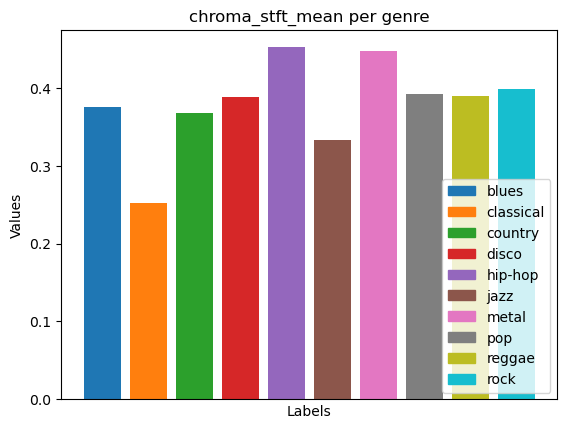

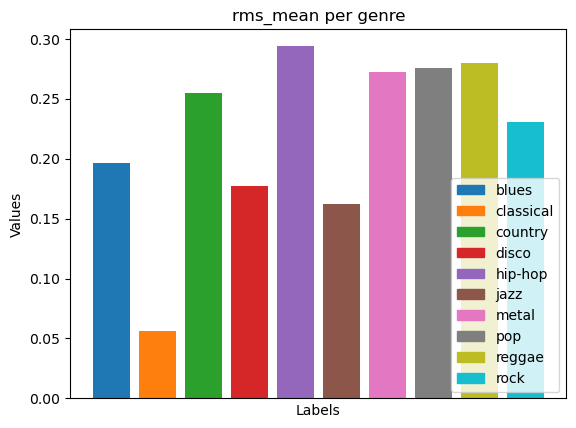

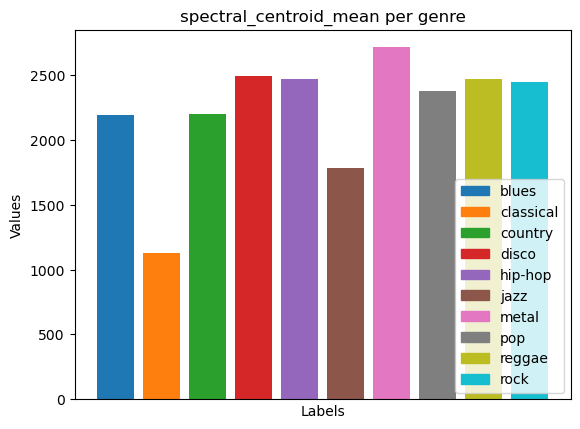

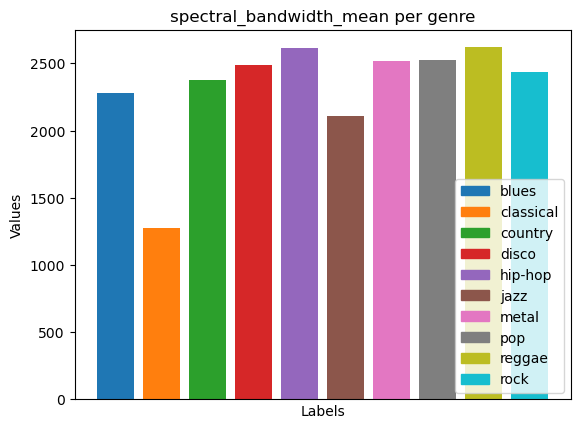

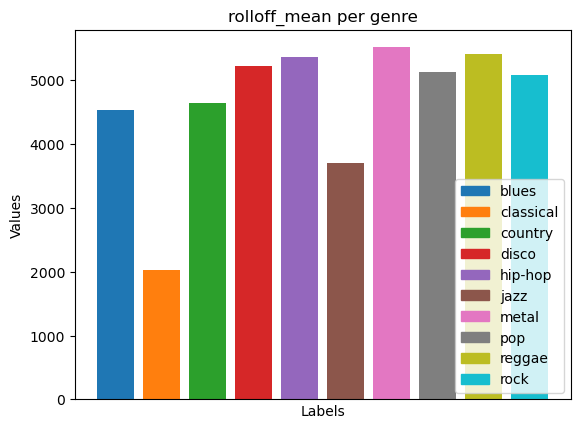

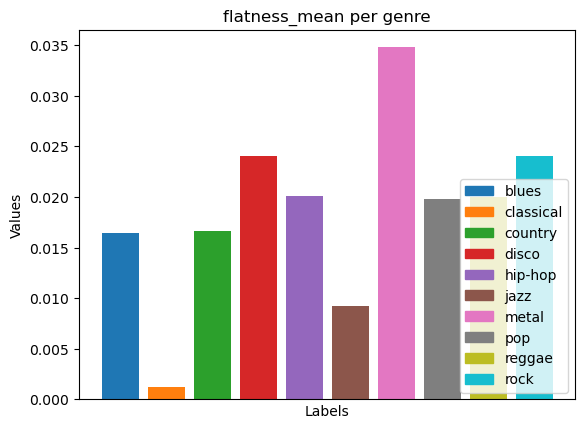

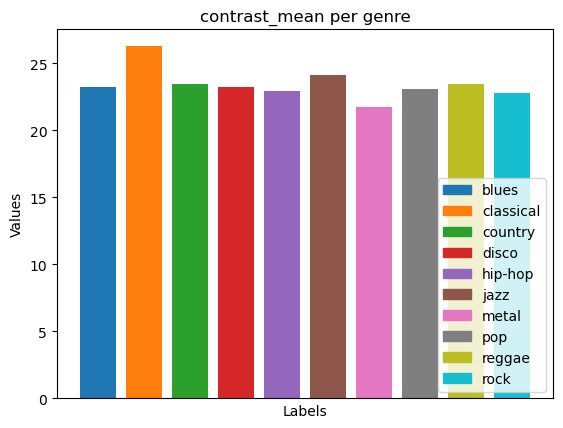

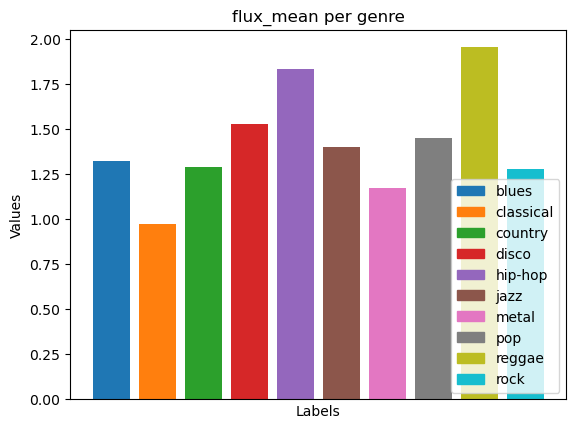

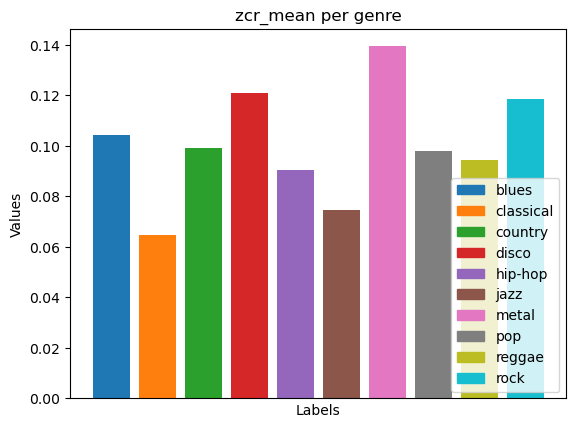

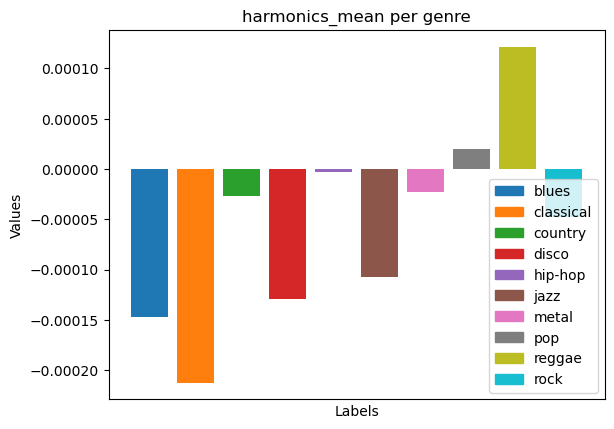

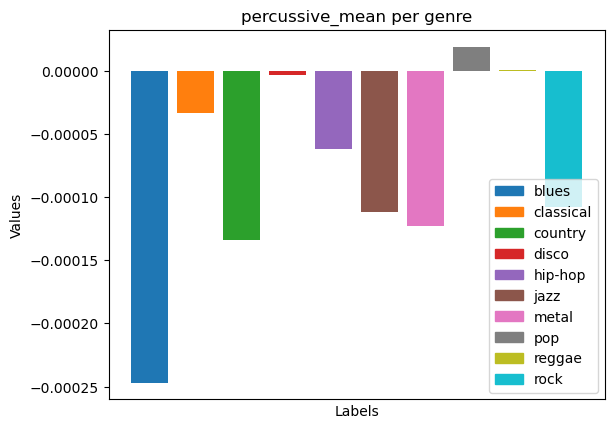

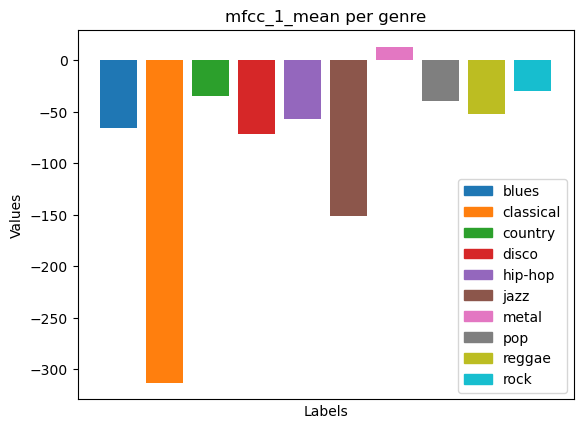

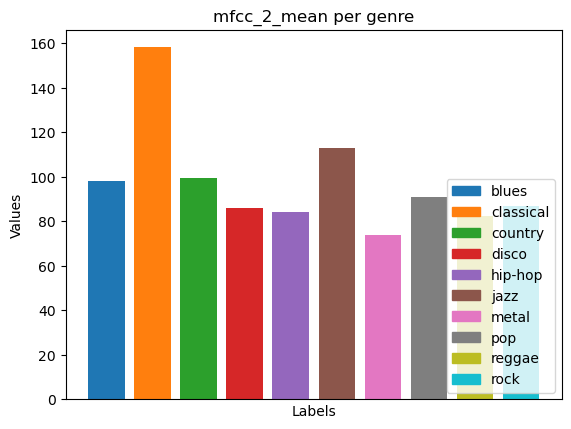

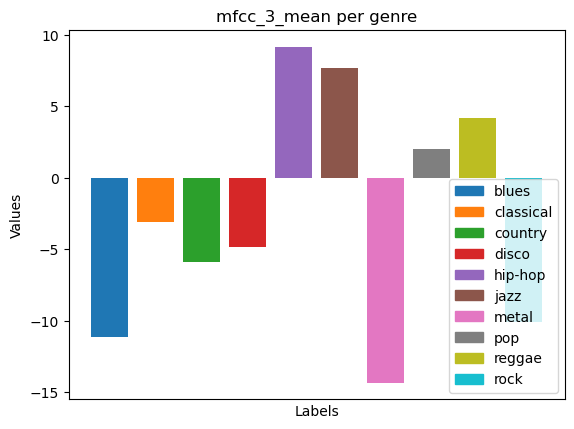

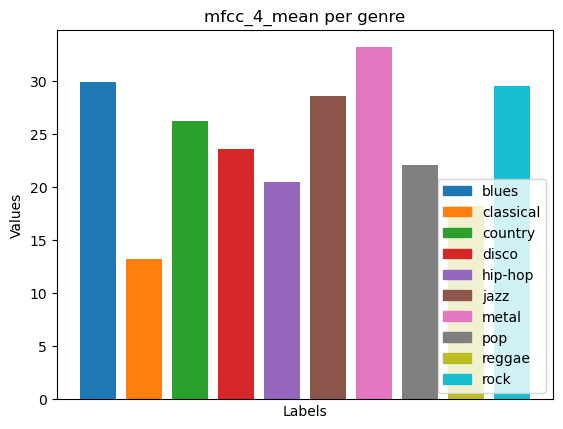

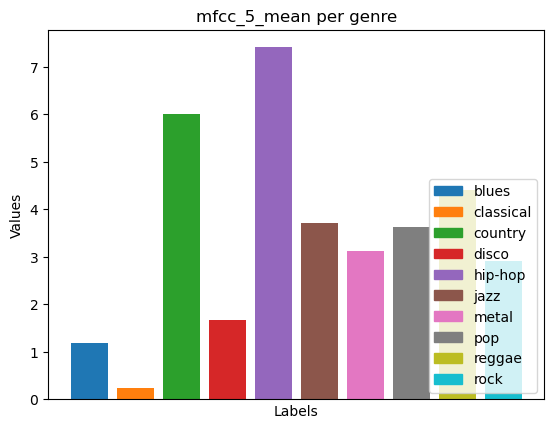

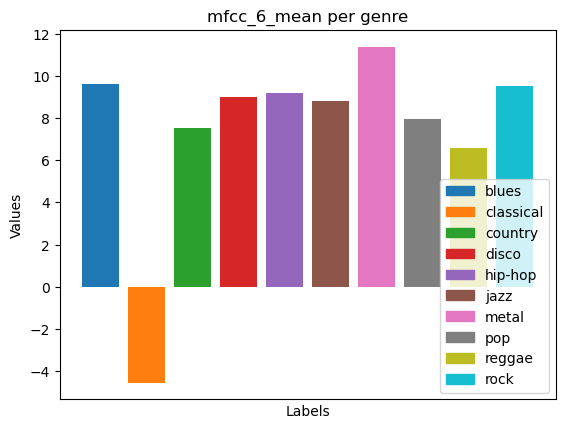

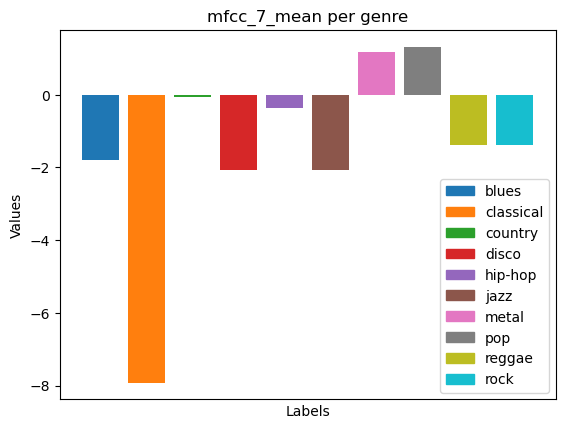

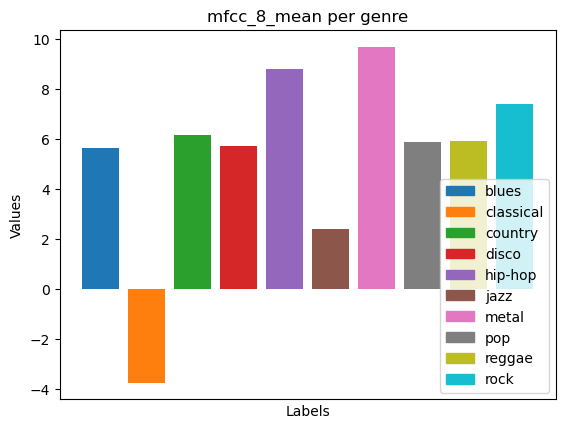

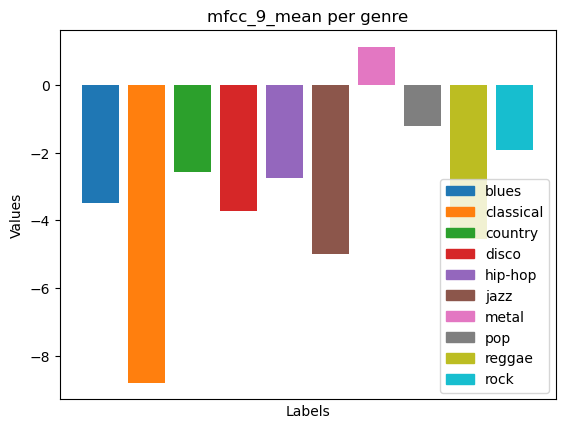

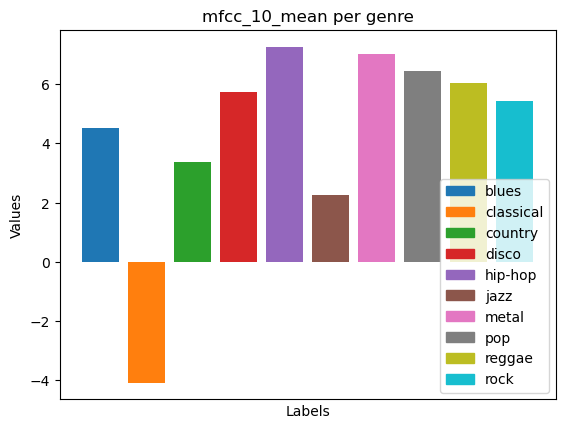

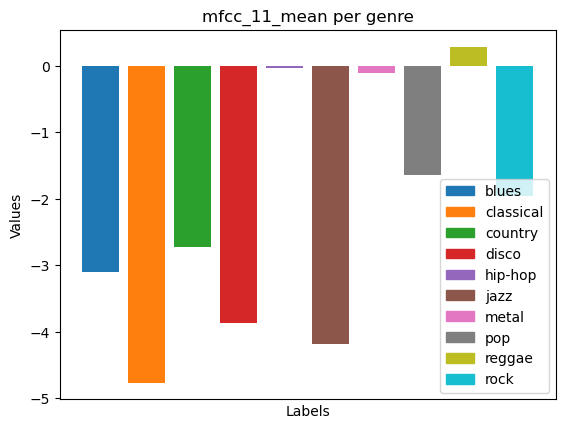

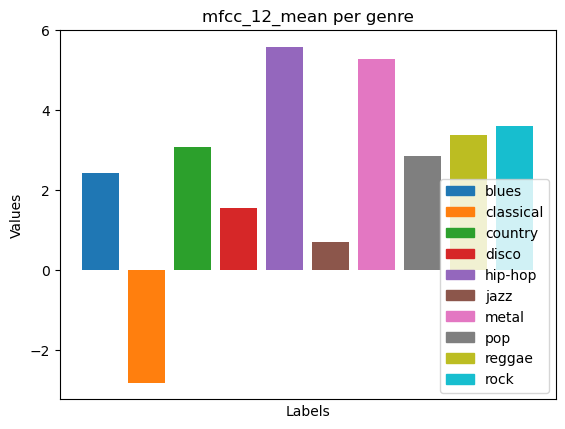

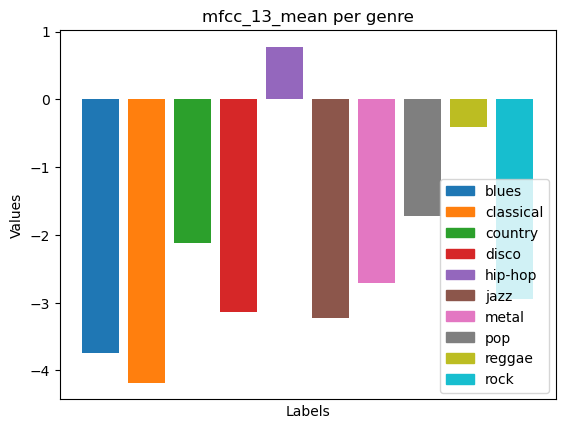

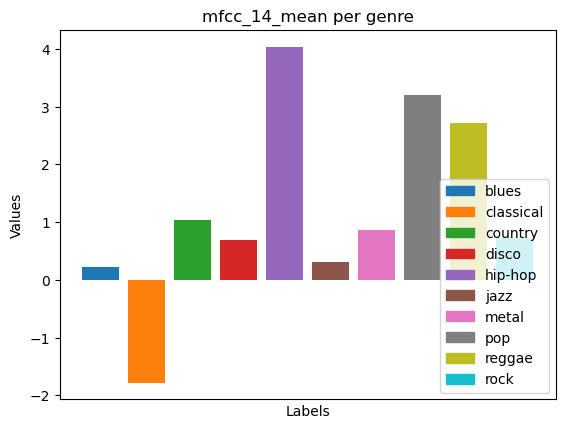

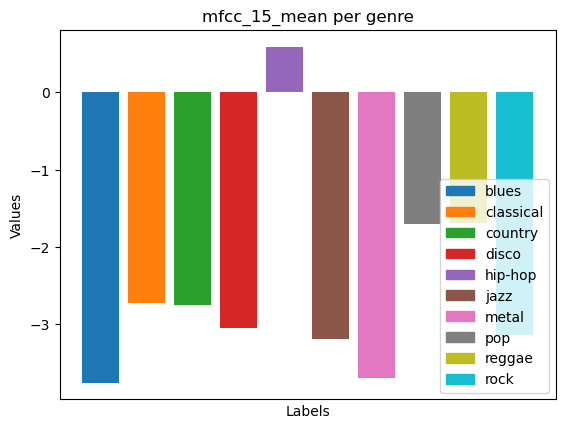

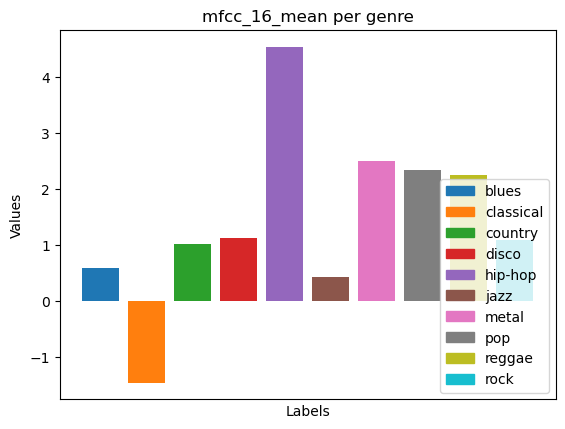

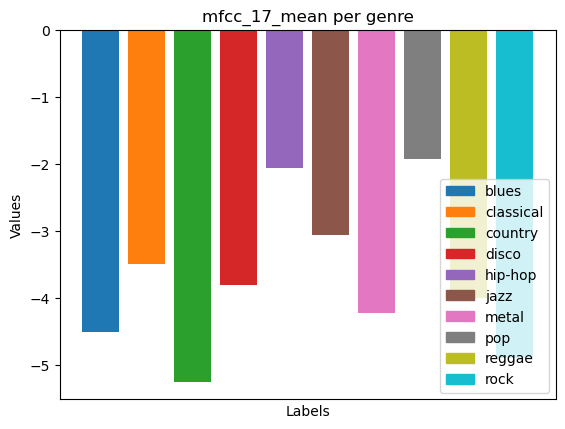

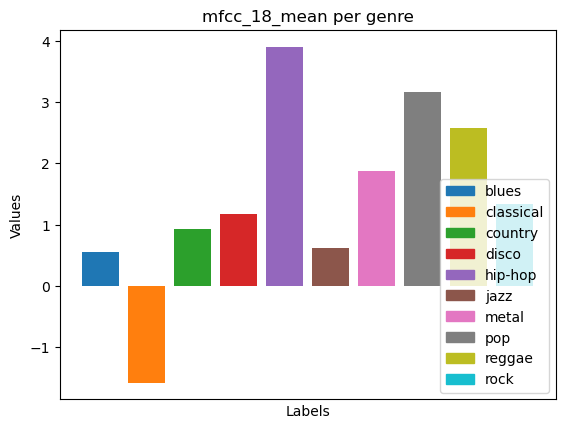

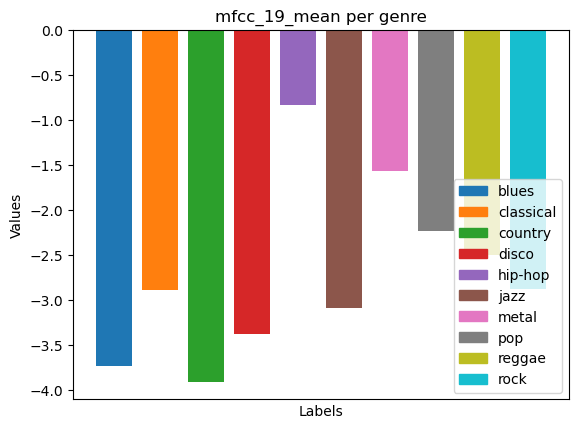

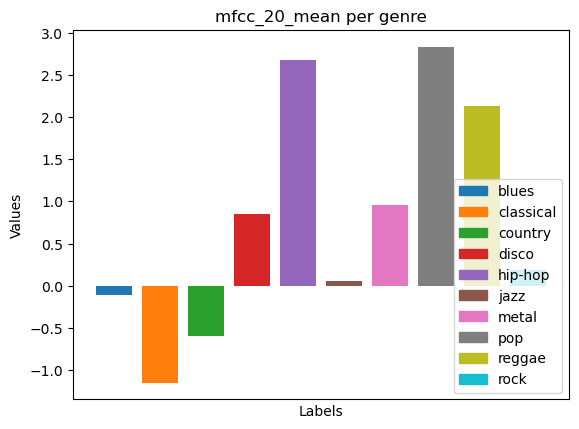

In [37]:
for idx, col in enumerate(dataframe_cols):
    means = []
    for label in features.keys():
        means += [features[label][idx]]

    colors = matplotlib.colormaps.get_cmap('tab10')(np.arange(10))
    plt.bar(range(len(genres)), means, color=colors)
    plt.xticks([])
    plt.title(f'{col} per genre')
    plt.xlabel('Labels')
    plt.ylabel('Values')
    handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(10)]
    plt.legend(handles, features.keys(), loc=4)
    plt.show()